## 🚀 Project Initialization   
This repository is the starting point of my Titanic Data Analysis project. The goal is to explore the Titanic dataset, clean and preprocess the data, perform exploratory analysis, and build predictive models to understand which factors influenced passenger survival.   
-------------
📦 Next Steps   
- Set up the project structure (data, notebooks, src, reports).  
- Install the required Python libraries.  
- Begin exploratory data analysis (EDA).
-------------
⚙️ Required Libraries:

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn jupyterlab nbconvert imblearn -q 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


🔹 Next Steps: 

- Read the CSV file using pandas.  
- Inspect the first few rows and basic information (.head(), .info(), .describe()).  
- Begin exploratory data analysis (EDA).

In [2]:
import pandas as pd

# remember to put your system path
data = r"D:\Desktop\Analysis_Titanic\Titanic-analysis\data\titanic.csv"
#data = r'C:\Users\LarTI\OneDrive\Desktop\Projects\Titanic-analysis\data\titanic.csv'

df = pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Exploring Dataset Structure with 'df.info()'
The command:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### View summary statistics for numeric columns

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking for Missing Data

After loading the Titanic dataset and reviewing its structure with 'df.info()' and, the next step is to identify missing values in the dataset.  

We use:

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Separating Features and Target

In supervised machine learning, we divide the dataset into:

- **Target variable (`y`)** → the outcome we want to predict.  
- **Features (`X`)** → the input variables used to make the prediction.  

For the Titanic dataset:

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())# Fill missing values in Age using the median

y = df['Survived'] # Target variable

X = df[['Pclass', 'Sex', 'Age', 'Fare']] # Features - select relevant columns


#### Dividing the Dataset into Train and Test Sets

To evaluate how well our machine learning model generalizes to unseen data, we split the dataset into:

- **Training set (70%)** – used to train the model.
- **Test set (30%)** – used to evaluate model performance on unseen data.

We'll use `train_test_split` from `sklearn.model_selection`, setting a `random_state` for reproducibility.

In [7]:
# Split data: 70% train, 30% test, random_state for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Preprocessing: Handling Missing Values and Encoding

1. **Fill Missing Values (Age)**  
   Used `SimpleImputer` with `strategy='mean'` to replace missing values in the `Age` column with the column average.  

2. **Encode Categorical Data (Sex)**  
   Applied `LabelEncoder` to transform the `Sex` column into numeric values (e.g., male = 1, female = 0).  

3. **Redefine Features and Target**  
   Selected features `Pclass`, `Sex`, `Age`, and `Fare` for `X`, with `y = Survived` as the target.  

4. **Verify Data Quality**  
   Ran:


In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Fill missing values in the 'Age' column with the mean
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Transform 'Sex' into numeric
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Redefine X and y (with cleaned data)
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Check for any remaining missing values
print(X.isnull().sum())

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64


#### Visualizing the Titanic Dataset

In this section, we create basic charts to explore the dataset and understand the distribution of key variables.

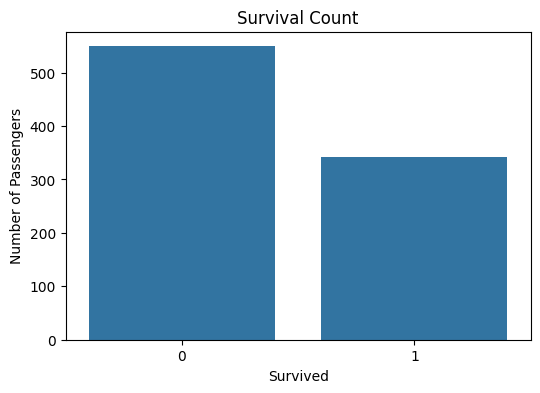

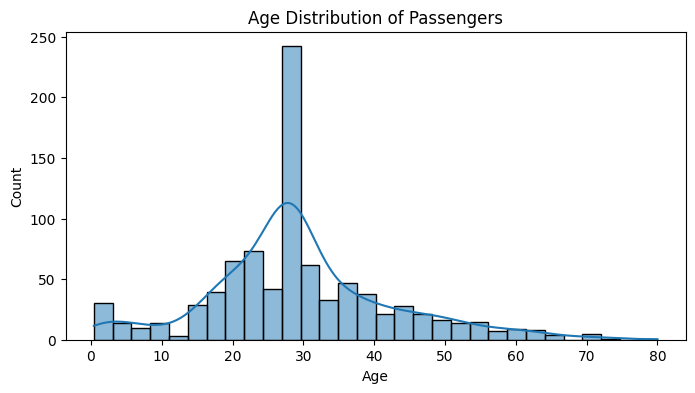

In [9]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots show inside the notebook
%matplotlib inline

# 1. Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

# 2. Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


#### Modeling: Random Forest Classifier

In this section, we preprocess the data, split it into training and testing sets, and train a **Random Forest Classifier** to predict survival on the Titanic dataset.

1. **Fill Missing Values**

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Fill missing values in Age
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# 2. Convert 'Sex' to numeric
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# 3. Select features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# 4. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Modeling: Gradient Boosting Classifier

In this section, we create and train a **Gradient Boosting Classifier** to predict survival on the Titanic dataset.

**Create the Model**:

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)